In [0]:
%pip install transformers

In [0]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

import numpy as np
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
# % matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
# max_sent_length = 512 # BERT Base
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_sent_length = tokenizer.max_len
print("Max number of tokens in one sentence:", tokenizer.max_len)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
%cd ./gdrive/My Drive/00_IRTG1792/w2v_GloVe_U3/finanialReportAnalysis/notebooks

/content/gdrive/My Drive/00_IRTG1792/w2v_GloVe_U3/finanialReportAnalysis/notebooks


In [0]:
data_path = '../data/'

In [0]:
# Load Testing Data
f = open("test_text.txt", "r")
text1 = f.read()

In [0]:
sent1 = sent_tokenize(text1)
sent1_token = []
for s in sent1:
  sent1_token.append((tokenizer.encode(s, pad_to_max_length=512)))
  # s.insert(0, '[CLS]')
  # s.insert(-1, '[SEP]')

In [0]:
indexed_token = []
for st in sent1_token:
  indexed_token.append(tokenizer.convert_tokens_to_ids(st))

In [13]:
# For more information
tokenizer.pretrained_vocab_files_map

{'vocab_file': {'bert-base-cased': 'https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-vocab.txt',
  'bert-base-cased-finetuned-mrpc': 'https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-finetuned-mrpc-vocab.txt',
  'bert-base-chinese': 'https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-chinese-vocab.txt',
  'bert-base-dutch-cased': 'https://s3.amazonaws.com/models.huggingface.co/bert/wietsedv/bert-base-dutch-cased/vocab.txt',
  'bert-base-finnish-cased-v1': 'https://s3.amazonaws.com/models.huggingface.co/bert/TurkuNLP/bert-base-finnish-cased-v1/vocab.txt',
  'bert-base-finnish-uncased-v1': 'https://s3.amazonaws.com/models.huggingface.co/bert/TurkuNLP/bert-base-finnish-uncased-v1/vocab.txt',
  'bert-base-german-cased': 'https://int-deepset-models-bert.s3.eu-central-1.amazonaws.com/pytorch/bert-base-german-cased-vocab.txt',
  'bert-base-german-dbmdz-cased': 'https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-german-dbmdz-cased-voc

In [0]:
for tup in zip(tokenizer.convert_ids_to_tokens(indexed_token[0]), indexed_token[0]):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

In [16]:
model = BertModel.from_pretrained('bert-base-uncased')

In [0]:
input2model = torch.tensor(indexed_token)
outputs = model(input2model)

In [20]:
outputs[0].size()

torch.Size([8, 512, 768])

In [0]:
company_vector = torch.mean(outputs[0], dim =0)
company_vector = torch.mean(company_vector, dim =0)

In [0]:
company_vector = company_vector.detach().numpy()

In [57]:
company_vector.shape

(768,)

In [0]:
company_vector

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
originalOutput = outputs[0].detach().numpy().ravel()

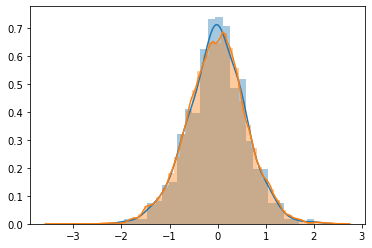

In [70]:
sns.distplot(company_vector)
sns.distplot(originalOutput)